Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "David Kim & Maya Schuchert"

---

In [2]:
from __future__ import print_function
import numpy
import scipy
import matplotlib.pyplot as plt
import sympy
sympy.init_printing()
import warnings
%matplotlib inline


# HW 2:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point *for all values* of $\sqrt{M}$ and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration number.  If the solution converges: 
    * Describe the convergence rate (linear, quadratic, etc)
    * How many iterations are required to reduce the relative error to machine precision?


**Remember**: if you want to write $g^\prime$, remember to use `g^\prime` rather than `g'` in $\LaTeX$ (otherwise nbgrader gets very unhappy)

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [3]:
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial guess
        - *N* (int) - number of terms in iteration
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """
    x = numpy.empty(N+1)
    x[0] = x0
    
    for i in range(N):
        x0 = g(x0)
        x[i+1] = x0
        
    return x

In [4]:
# Testing Cell

N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979, 0.79348036, 0.70136877])

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
print('success: passed N=5 test')

x_true = 0.7390851332153119
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success: passed N=1000 test')

success: passed N=5 test
success: passed N=1000 test


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

\begin{equation}
g(\sqrt{M})=1+\sqrt{M}-\frac{\sqrt{M}^2}{M} \\
g(\sqrt{M})=1+\sqrt{M}-1 \\
g(\sqrt{M})=\sqrt{M} \\
|g^\prime(x)|=|1-\frac{2x}{M}|<1 \\
\end{equation}
0 $< x < M$ to converge. For $M$ > 1, the fixed point of $\sqrt{M}$ lies within the interval, therefore the iterative scheme is stable and coverges linearly as shown below

18 iterations are needed to reduce relative error to machine epselon


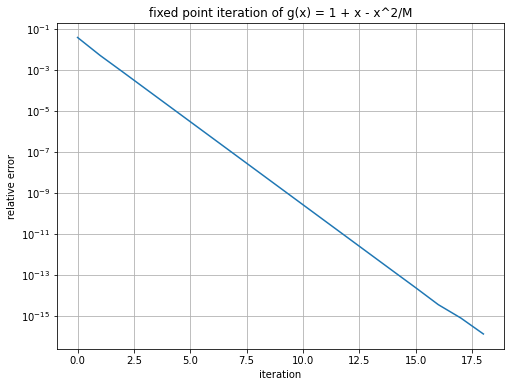

In [5]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1 , 1, 1)
M = 3
g = lambda x: 1.0 + x - ((x**2) / M)
N = 18
x_array = fixed_point(g,2,N)
g_array = abs(g(x_array))
f = numpy.sqrt(M)
r = abs(f - g_array)/f
i = numpy.linspace(0.0, N, N+1)
axes.grid()
axes.set_xlabel('iteration')
axes.set_ylabel('relative error')
axes.set_title('fixed point iteration of g(x) = 1 + x - x^2/M')
axes.set_yscale("log")
axes.plot(i, r)
axes.set_yscale("log")
eps = numpy.finfo(float).eps
if r[-1] <= eps:
    print(N, "iterations are needed to reduce relative error to machine epselon")

 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

\begin{equation}
g(\sqrt{M})= \frac{M}{\sqrt{M}}=\sqrt{M}\\
|g^\prime(x)|=|-\frac{M}{x^2}|<1\\
\end{equation}
$x < -\sqrt{M}$ or $x > \sqrt{M}$ to converge. When x = $\sqrt{M}$, the scheme is unstable and does not converge, it keeps alternating between x and M/x

**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f^\prime}$$

with $$ f = x^2 - M$$

\begin{equation}
g(x)=x-\frac{x^2-M}{2x}=\frac{x}{2}+\frac{M}{2x}\\
g(\sqrt{M})=\frac{\sqrt{M}}{2}+\frac{M}{2\sqrt{M}}=\frac{\sqrt{M}}{2}+\frac{\sqrt{M}}{2}=\sqrt{M}\\
g(x)=x-\frac{f(x)}{f^\prime(x)}\\
g^\prime(x)=1-\frac{f^\prime(x)}{f^\prime(x)}+\frac{f(x)f^{\prime \prime}(x)}{(f^\prime(x)^2)}=\frac{f(x)f^{\prime \prime}(x)}{(f^\prime(x)^2)}\\
g^\prime(x^*)=\frac{f(x^*)f^{\prime \prime}(x^*)}{(f^\prime(x^*)^2)}=0\\
\end{equation}
As $f(x^*)=0$ by defition, unless M = 0, $f^\prime$ will not be zero and the scheme will be stable and coverge. The next plot demonstrate quadratic convergence

3 iterations are needed to reduce relative error to machine epselon


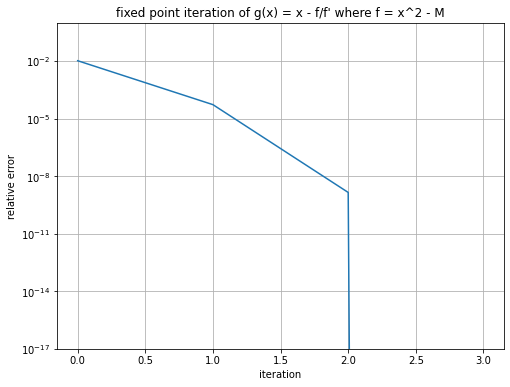

In [23]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
M = 3
g = lambda x: (x/2)+(M/(2*x))
N = 3
x_array = fixed_point(g,2,N)
g_array = abs(g(x_array))
f = numpy.sqrt(M)
r = abs(f-g_array)/f
i = numpy.linspace(0.0, N, N+1)
axes.grid()
axes.set_xlabel('iteration')
axes.set_ylabel('relative error')
axes.set_ylim(10**-17)
axes.set_title('fixed point iteration of g(x) = x - f/f\' where f = x^2 - M')
axes.plot(i, r)
axes.set_yscale("log")
eps = numpy.finfo(float).eps
if r[-1] <= eps:
    print(N, "iterations are needed to reduce relative error to machine epselon")

## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use any or all  of the routines presented in class which have been included in an auxiliary python file `rootfinding_optimization_schemes.py`


You need to have this file in the same directory with your homework for this notebook to import it.

In [7]:
#  Cell to import and test at least newton's method from class

from  rootfinding_optimization_schemes import newton
from  rootfinding_optimization_schemes import bisection
from  rootfinding_optimization_schemes import secant
from  rootfinding_optimization_schemes import parabolic_interpolation
from scipy.optimize import root_scalar

# set test function and its derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.05$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles.  You should plot all three curves on the same plot

Text(0.5, 1.0, 'f(x) = cos(x) + 0.05[sin(ax) + sin(bx)] with various (a,b) pairs')

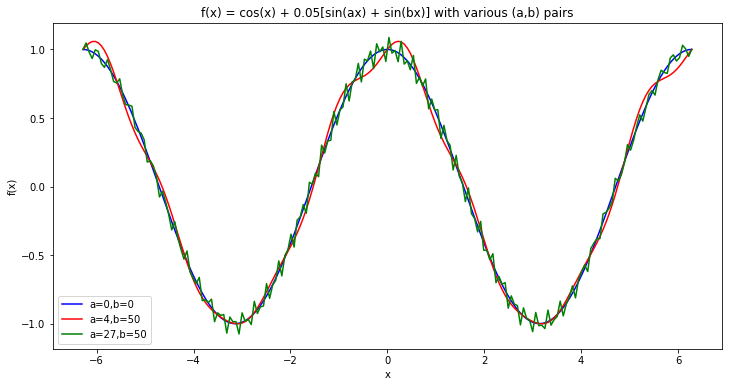

In [8]:
pi = numpy.pi
x = numpy.linspace(-2*numpy.pi, 2*numpy.pi, 200)
f1 = lambda x : numpy.cos(x) + 0.05*(numpy.sin(0*x)+numpy.sin(0*x))
f2 = lambda x : numpy.cos(x) + 0.05*(numpy.sin(4*x)+numpy.sin(5*x))
f3 = lambda x : numpy.cos(x) + 0.05*(numpy.sin(27*x)+numpy.sin(50*x))
fig = plt.figure(figsize=(12, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f1(x), 'b', label = "a=0,b=0")
axes.plot(x, f2(x), 'r', label = "a=4,b=50")
axes.plot(x, f3(x), 'g', label = "a=27,b=50")
axes.legend(loc = 'best')
axes.set_xlabel('x')
axes.set_ylabel('f(x)')
axes.set_title('f(x) = cos(x) + 0.05[sin(ax) + sin(bx)] with various (a,b) pairs')

**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* brentq method using scipy.optimize.root_scalar
* **EXTRA CREDIT** any other method used in root_scalar

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.2$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [9]:
#bisection
bx1, bx1_array = bisection(f1, 0.2, 2.0)
bx2, bx2_array = bisection(f2, 0.2, 2.0)
bx3, bx3_array = bisection(f3, 0.2, 2.0)

#newton
x = sympy.symbols('x') 
f1 = sympy.cos(x) + 0.05*(sympy.sin(0*x)+sympy.sin(0*x))
f1_prime = f1.diff(x)
f1 = sympy.lambdify(x,f1)
f1_prime = sympy.lambdify(x,f1_prime)
f2 = sympy.cos(x) + 0.05*(sympy.sin(4*x)+sympy.sin(5*x))
f2_prime = f2.diff(x)
f2 = sympy.lambdify(x,f2)
f2_prime = sympy.lambdify(x,f2_prime)
f3 = sympy.cos(x) + 0.05*(sympy.sin(27*x)+sympy.sin(50*x))
f3_prime = f3.diff(x)
f3 = sympy.lambdify(x,f3)
f3_prime = sympy.lambdify(x,f3_prime)


nx1, nx1_array = newton(f1, f1_prime, 0.2)
nx2, nx2_array = newton(f2, f2_prime, 0.2)
nx3, nx3_array = newton(f3, f3_prime, 0.2)

#secant
sx1, sx1_array = secant(f1, 0.2, 2.0)
sx2, sx2_array = secant(f2, 0.2, 2.0)
sx3, sx3_array = secant(f3, 0.2, 2.0)

#brentq
qsol1 = root_scalar(f1, bracket=(0.2, 2), method='brentq')
q1, q1_i = qsol1.root, qsol1.iterations
qsol2 = root_scalar(f2, bracket=(0.2, 2), method='brentq')
q2, q2_i = qsol2.root, qsol2.iterations
qsol3 = root_scalar(f3, bracket=(0.2, 2), method='brentq')
q3, q3_i = qsol3.root, qsol3.iterations

#toms748
tsol1 = root_scalar(f1, bracket=(0.2, 2), method='toms748')
t1, t1_i = tsol1.root, tsol1.iterations
tsol2 = root_scalar(f2, bracket=(0.2, 2), method='toms748')
t2, t2_i = tsol2.root, tsol2.iterations
tsol3 = root_scalar(f3, bracket=(0.2, 2), method='toms748')
t3, t3_i = tsol3.root, tsol3.iterations

#f1 results
print("for a=0, b=0:")
print("bisection found a root at {} with a value of {} in {} iterations".format(bx1, f1(bx1), bx1_array.size))
print("newtons method found a root at {} with a value of {} in {} iterations".format(nx1, f1(nx1), nx1_array.size))
print("secant method found a root at {} with a value of {} in {} iterations".format(sx1, f1(sx1), sx1_array.size))
print("brents method found a root at {} with a value of {} in {} iterations".format(q1, f1(q1), q1_i))
print("toms748 method found a root at {} with a value of {} in {} iterations\n".format(t1, f1(t1), t1_i))

#f2 results
print("for a=4, b=5:")
print("bisection found a root at {} with a value of {} in {} iterations".format(bx2, f2(bx2), bx2_array.size))
print("newtons method found a root at {} with a value of {} in {} iterations".format(nx2, f2(nx2), nx2_array.size))
print("secant method found a root at {} with a value of {} in {} iterations".format(sx2, f2(sx2), sx2_array.size))
print("brents method found a root at {} with a value of {} in {} iterations".format(q2, f2(q2), q2_i))
print("toms748 method found a root at {} with a value of {} in {} iterations\n".format(t2, f2(t2), t2_i))

#f3 results
print("for a=27, b=50:")
print("bisection found a root at {} with a value of {} in {} iterations".format(bx3, f3(bx3), bx3_array.size))
print("newtons method found a root at {} with a value of {} in {} iterations".format(nx3, f3(nx3), nx3_array.size))
print("secant method found a root at {} with a value of {} in {} iterations".format(sx3, f3(sx3), sx3_array.size))
print("brents method found a root at {} with a value of {} in {} iterations".format(q3, f3(q3), q3_i))
print("toms748 method found a root at {} with a value of {} in {} iterations".format(t3, f3(t3), t3_i))

for a=0, b=0:
bisection found a root at 1.570796775817871 with a value of -4.490229742968679e-07 in 20 iterations
newtons method found a root at 4.71238898038469 with a value of -1.8369701987210297e-16 in 5 iterations
secant method found a root at 1.5707963267998242 with a value of -4.927552640156338e-12 in 6 iterations
brents method found a root at 1.5707963267948966 with a value of 6.123233995736766e-17 in 7 iterations
toms748 method found a root at 1.570796326795897 with a value of -1.0004717574522338e-12 in 4 iterations

for a=4, b=5:
bisection found a root at 1.6304405212402344 with a value of 1.9620940003295395e-07 in 18 iterations
newtons method found a root at -14.096326236971352 with a value of 6.931560738582254e-08 in 5 iterations
secant method found a root at 1.6304406749277849 with a value of 6.137287288099369e-08 in 7 iterations
brents method found a root at 1.630440744880973 with a value of -2.983724378680108e-16 in 8 iterations
toms748 method found a root at 1.6304407448

**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.2$.  Hint: your convergence plots should use `semilogy` for clearest results.  Again put all your results on one plot and label things well

In [10]:
axes.semilogy?

Text(0.5, 1.0, "relative error between each step of newton's method and the final root it returns")

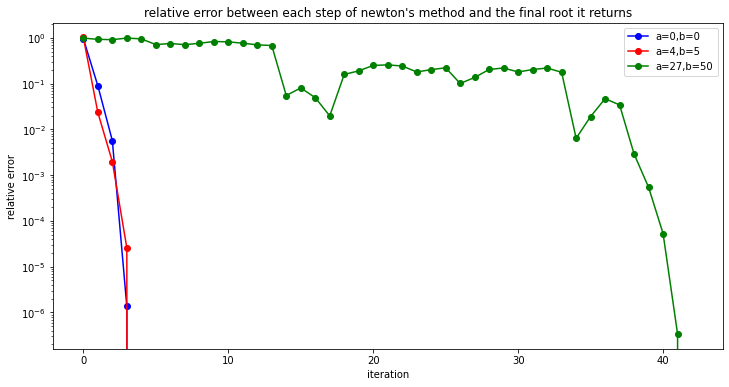

In [11]:
fig = plt.figure(figsize=(12, 6))
axes = fig.add_subplot(1, 1, 1)
r1 = abs(nx1 - nx1_array) / abs(nx1)
r2 = abs(nx2 - nx2_array) / abs(nx2)
r3 = abs(nx3 - nx3_array) / abs(nx3)
axes.semilogy(numpy.arange(len(r1)), r1, 'bo-', label = "a=0,b=0")
axes.semilogy(numpy.arange(len(r2)), r2, 'ro-', label = "a=4,b=5")
axes.semilogy(numpy.arange(len(r3)), r3, 'go-', label = "a=27,b=50")
axes.legend(loc='best')
axes.set_xlabel('iteration')
axes.set_ylabel('relative error')
axes.set_title('relative error between each step of newton\'s method and the final root it returns')

**(d)** [4] Briefly explain your results so far for all the methods.  Feel free to play with other initial parameters or to make additional plots.  

Newton's method does not arrive at the local root as the other methods do but is ruled by basins of attraction. Bisection took usually the most iterations and was the least accurate. Toms748 took the least amount of iterations. Brent's was the most accurate usually. Lastly, the secant method was time consuming and moderately accurate

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

`x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)`

In [12]:
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    """ Please improve this docstring
        
    
    Parameters:
    -----------
    
    f: function (float)
        function returning f(x)
    f_prime:  function (float)
        function returning derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f(x)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """
    if numpy.sign(f(a)) == numpy.sign(f(b)):
        raise ValueError("no bracket: f(a) and f(b) must have different signs")
    
    if b < a:
        d = a
        a = b
        b = d
    c = (a+b)/2
    n_newt = 0
    n_bi = 0
    
    for step in range(1, max_steps+1):

        if abs(f(c)) < tol:
            x = c
            break
        
        cn = c  - (f(c) / f_prime(c))
        if (a <= cn) and (cn <= b):
            c = cn
            n_newt += 1

        else:
            print('newton exceeded the bracket')
            if numpy.sign(f(a)) != numpy.sign(f(c)):
                b = c
            else:
                a = c
            c = (a+b)/2
            n_bi += 1

    
    if step == max_steps:
        warnings.warn('Maximum number of steps exceeded')
        x = c
    
    return x, n_newt, n_bi

In [13]:
# you can play with your code here

In [14]:
# Testing Cell
from  rootfinding_optimization_schemes import newton
from scipy.optimize import root_scalar

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.cos(a * x) + b*numpy.cos(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(sol.root, sol.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, sol.root,decimal=5)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 1.27194847295657,    N   = 3
NewtSafe = 1.27194847295657,    N_n = 3, N_b = 0
brentq   = 1.2719484732512498,    N   = 9

newton exceeded the bracket
newton exceeded the bracket
Bracket  = [-0.7104536143852529, 3.8152626763086603]
Newton   = -23.8662065317763,    N   = 7
NewtSafe = 1.0884990113244402,    N_n = 3, N_b = 2
brentq   = 1.088499013515958,    N   = 13

newton exceeded the bracket
Bracket  = [-0.5236057894835726, 3.9067882124238986]
Newton   = -10.863477689404652,    N   = 11
NewtSafe = 1.1106142646362411,    N_n = 5, N_b = 1
brentq   = 1.1106142646873127,    N   = 11

Bracket  = [-0.5275356434135271, 2.4988039593212776]
Newton   = 1.3248590962279085,    N   = 3
NewtSafe = 1.3248590962279085,    N_n = 3, N_b = 0
brentq   = 1.3248590968150393,    N   = 9

newton exceeded the bracket
Bracket  = [-0.3534683303763972, 3.9130408021252014]
Newton   = 1.1473182519095415,    N   = 10
NewtSafe = 1.1473181573836526,    N_n = 6

## Question 3 - Solve a "real" rootfinding problem

In Homework 2, I asked you to *estimate* the number of terms in the taylor expansion of $e^x$ such that the relative error was less than $\epsilon_{mach}$.  This was essentially a non-linear problem in the number of steps $n$.  Here we will use a rootfinder to get this number more precisely.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 0.1, 1., 10. ,100. , 709., 1000. and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


answer below

In [15]:
e = numpy.exp(1)
f = lambda n: eps - numpy.abs(((x*e)/(n+1))**(n+1))
g = lambda x: e*x
for x in [0.1, 1.0, 10.0, 100.0, 709.0, 1000]:
    sol = root_scalar(f, bracket=(0, 5*x+20), method='brentq')
    r = numpy.abs((sol.root-g(x))/sol.root)
    print("for x = {}, n = {} and has a relative error of {} with the approximation n = ex".format(x, sol.root, r))

for x = 0.1, n = 8.998252263613157 and has a relative error of 0.9697910021988253 with the approximation n = ex
for x = 1.0, n = 17.69326017986983 and has a relative error of 0.846366254674098 with the approximation n = ex
for x = 10.0, n = 52.392002821573556 and has a relative error of 0.48116474231450207 with the approximation n = ex
for x = 100.0, n = 304.8289018356014 and has a relative error of 0.1082598099818457 with the approximation n = ex
for x = 709.0, n = 1961.976573890756 and has a relative error of 0.017693767588901912 with the approximation n = ex
for x = 1000, n = 2753.0906500709116 and has a relative error of 0.012643543579275062 with the approximation n = ex
